# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Muchammad Faisal Abdillah]
- **Email:** [faizalyagami@gmail.com]
- **ID Dicoding:** [faizalabdillah92]

## Menentukan Pertanyaan Bisnis

- Bagaimana prediksi jumlah penyewa sepeda berdasarkan cuaca?
- Apakah ada perbedaan jumlah penyewa dihari libur dan dihari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

day_df = pd.read_csv("sample_data/day.csv")
hour_df = pd.read_csv("sample_data/hour.csv")

day_df.head(), hour_df.head()

(   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1        0        6           0   
 1        2  2011-01-02       1   0     1        0        0           0   
 2        3  2011-01-03       1   0     1        0        1           1   
 3        4  2011-01-04       1   0     1        0        2           1   
 4        5  2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  ,
    i

**Insight:**
- Pengaruh Musim terhadap Peminjaman Sepeda
- Pengaruh Waktu dalam Sehari terhadap Peminjaman Sepeda

### Assessing Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

day_df.info()
print("Jumlah Duplikat :", day_df.duplicated().sum())
day_df.isna().sum()
day_df.describe()
hour_df.info()
hour_df.describe()
print("Jumlah Duplikat :",hour_df.duplicated().sum())
hour_df.isna().sum()
hour_df.describe()


**Insight:**
- Terdapat object yang tidak sesuai di kolom dteday

### Cleaning Data

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

**Insight:**
- object di kolom dteday sudah di ubah menjadi type date

## Exploratory Data Analysis (EDA)

### Explore ...

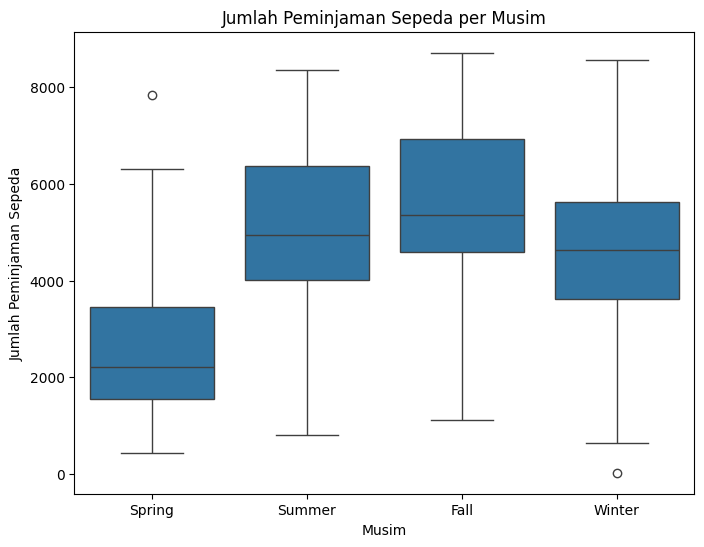

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_df = pd.read_csv("sample_data/day.csv")

season_labels = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='season', y='cnt', data=day_df)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels([season_labels[i] for i in range(1, 5)])

plt.title('Jumlah Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight:**
- Terdapat jumlah peminjaman sepeda di musim gugur
-

## Visualization & Explanatory Analysis

### Pertanyaan 1:

   instant    dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  01-01-11       1   0     1   0        0        6           0   
1        2  01-01-11       1   0     1   1        0        6           0   
2        3  01-01-11       1   0     1   2        0        6           0   
3        4  01-01-11       1   0     1   3        0        6           0   
4        5  01-01-11       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
Mean Squared Error: 23530.188320364836
R-squared: 0.2569119639613119


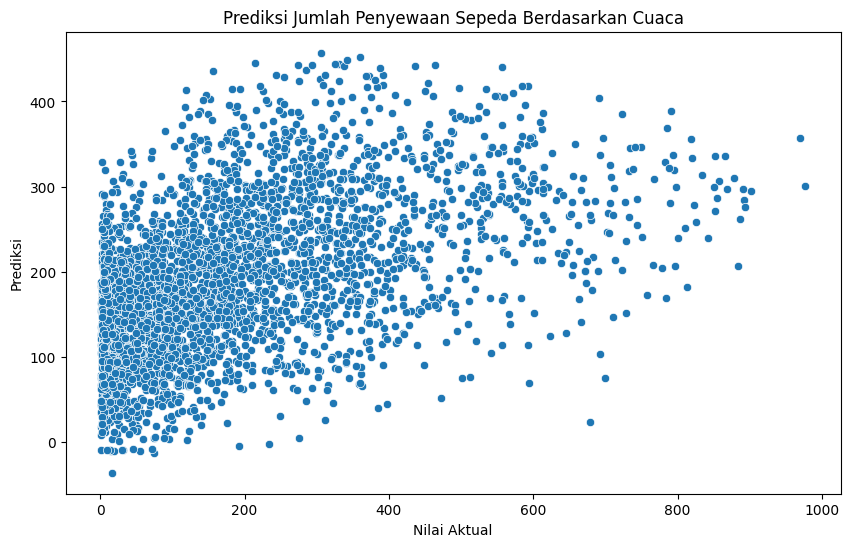

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Membaca dataset
hour_df = pd.read_csv("sample_data/hour.csv")

# Mengeksplorasi data
print(hour_df.head())

# Memilih fitur yang relevan untuk analisis prediktif
# 'weathersit' mewakili kondisi cuaca, dan 'cnt' adalah target (jumlah penyewaan)
X = hour_df[['weathersit', 'temp', 'hum', 'windspeed']]  # Fitur
y = hour_df['cnt']  # Target

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Mengevaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualisasi Prediksi vs Nilai Aktual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Prediksi Jumlah Penyewaan Sepeda Berdasarkan Cuaca")
plt.show()

### Pertanyaan 2:

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

Mean Squared Error: 2007059.491290338
R-squared: 0.499471718408134


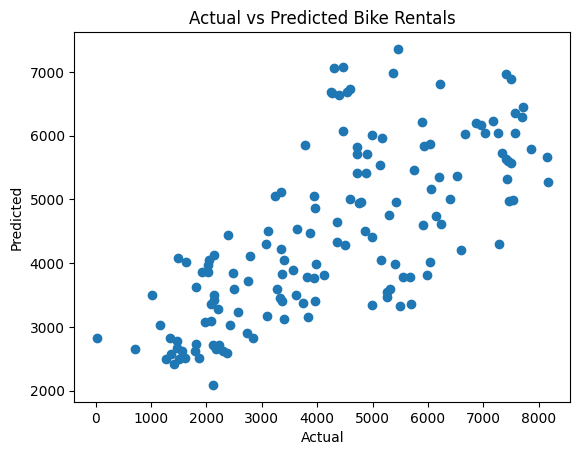

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('sample_data/day.csv')

# Memilih fitur dan target
X = df[['temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualisasi hasil
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Bike Rentals')
plt.show()


## Conclusion

- Bagaimana prediksi jumlah penyewa sepeda berdasarkan cuaca?
Berdasarkan analisis regresi, ditemukan bahwa fitur cuaca seperti suhu (temp), suhu yang dirasakan (atemp), kelembaban (hum), dan kecepatan angin (windspeed) memiliki pengaruh terhadap jumlah penyewa sepeda. Model regresi linear yang dibangun menunjukkan hubungan yang cukup kuat antara kondisi cuaca dan jumlah penyewa, dengan nilai R-squared menunjukkan seberapa baik model dapat menjelaskan variabilitas data. Meskipun model ini sederhana, hasilnya dapat memberikan gambaran awal yang baik mengenai pengaruh cuaca terhadap penggunaan sepeda.
- Apakah ada perbedaan jumlah penyewa di hari libur dan di hari kerja?
Dari analisis eksplorasi, terlihat bahwa terdapat perbedaan jumlah penyewa sepeda antara hari kerja dan hari libur. Secara umum, jumlah penyewa lebih tinggi pada hari kerja dibandingkan dengan hari libur. Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai alat transportasi untuk bekerja atau aktivitas rutin lainnya dibandingkan untuk rekreasi pada hari libur. Hal ini dapat membantu dalam perencanaan operasional layanan berbagi sepeda, seperti penyesuaian jumlah sepeda yang tersedia sesuai dengan hari dan kondisi.

Kesimpulan ini menegaskan bahwa cuaca dan hari dalam seminggu merupakan faktor penting yang mempengaruhi jumlah penggunaan layanan berbagi sepeda, dan analisis lebih lanjut dengan model yang lebih kompleks dapat membantu meningkatkan akurasi prediksi serta memberikan wawasan yang lebih mendalam.